<a href="https://colab.research.google.com/github/gunelatakishyeva/DeepLearningProjects/blob/main/transfer_learning_feature_extraction_part2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-07-29 16:39:22--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-29 16:39:22 (88.9 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-07-29 16:39:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   236MB/s    in 0.7s    

2024-07-29 16:39:23 (236 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [ ]:
unzip_data('10_food_classes_10_percent.zip')

In [ ]:
walk_through_dir('10_food_classes_10_percent.zip')

In [ ]:
train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)
BATCH_SIZE=32

train_data_10_percent=tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                        image_size=IMG_SIZE,
                                                        label_mode='categorical',
                                                        batch_size=BATCH_SIZE)

test_data_10_percent=tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 batch_size=BATCH_SIZE)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.60928574e+02 1.60928574e+02 1.69642853e+02]
   [1.63214294e+02 1.63214294e+02 1.75122452e+02]
   [1.64857147e+02 1.64423462e+02 1.78867355e+02]
   ...
   [1.74071457e+02 1.56499985e+02 1.42714249e+02]
   [1.74311234e+02 1.56311234e+02 1.42311234e+02]
   [1.75413284e+02 1.57413284e+02 1.43413284e+02]]

  [[1.67500000e+02 1.67428574e+02 1.69714279e+02]
   [1.69785721e+02 1.68785721e+02 1.74000000e+02]
   [1.71056122e+02 1.71056122e+02 1.79739792e+02]
   ...
   [1.78857147e+02 1.60857147e+02 1.47285675e+02]
   [1.78862244e+02 1.60862244e+02 1.46862244e+02]
   [1.79882660e+02 1.62882660e+02 1.46882660e+02]]

  [[1.73418365e+02 1.71489792e+02 1.65066330e+02]
   [1.75642853e+02 1.74030624e+02 1.69413269e+02]
   [1.76642853e+02 1.74857132e+02 1.74954071e+02]
   ...
   [1.80596924e+02 1.62765289e+02 1.48428543e+02]
   [1.81428574e+02 1.64000000e+02 1.48183670e+02]
   [1.83214279e+02 1.64214279e+02 1.48785721e+02]]

  ...

  [[1.94285645e+02 1.38566330e+02 7.50101700e+01]
   [1

In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_shape')

x=base_model(inputs)
print(f'shape after passing inputs through base model:{x.shape}')

x=tf.keras.layers.GlobalAveragePooling2D(name='Global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D {x.shape}')

outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_0=tf.keras.Model(inputs,outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_10_percent=model_0.fit(train_data_10_percent,epochs=5,
            validation_data=test_data_10_percent,
            batch_size=32,
            steps_per_epoch=len(train_data_10_percent),
            validation_steps=len(test_data_10_percent))

shape after passing inputs through base model:(None, 7, 7, 1280)
Shape after GlobalAveragePooling2D (None, 1280)
Epoch 1/5
24/24 [==============================] - 16s 380ms/step - loss: 1.7925 - accuracy: 0.4760 - val_loss: 1.2446 - val_accuracy: 0.7564
Epoch 2/5
24/24 [==============================] - 7s 289ms/step - loss: 1.0443 - accuracy: 0.7907 - val_loss: 0.8388 - val_accuracy: 0.8260
Epoch 3/5
24/24 [==============================] - 9s 357ms/step - loss: 0.7610 - accuracy: 0.8427 - val_loss: 0.6794 - val_accuracy: 0.8408
Epoch 4/5
24/24 [==============================] - 12s 507ms/step - loss: 0.6174 - accuracy: 0.8573 - val_loss: 0.5955 - val_accuracy: 0.8548
Epoch 5/5
24/24 [==============================] - 7s 300ms/step - loss: 0.5228 - accuracy: 0.8853 - val_loss: 0.5454 - val_accuracy: 0.8628


In [ ]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 63ms/step - loss: 0.5454 - accuracy: 0.8628


[0.5454280972480774, 0.8628000020980835]

In [ ]:
base_model.layers

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_11
1 rescaling_16
2 normalization_8
3 rescaling_17
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activ

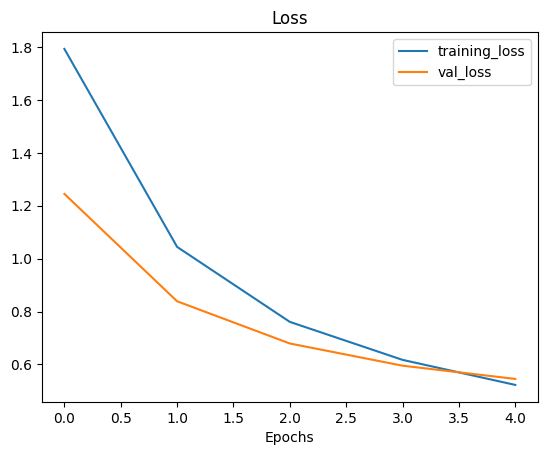

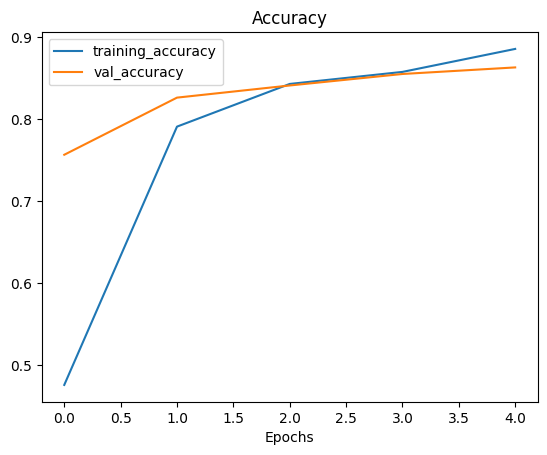

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-07-29 16:40:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.2’

10_food_classes_1_p 100%[===================>] 127.42M   150MB/s    in 0.8s    

2024-07-29 16:40:38 (150 MB/s) - ‘10_food_classes_1_percent.zip.2’ saved [133612354/133612354]



In [ ]:
unzip_data('10_food_classes_1_percent.zip')

In [ ]:
train_dir='/content/10_food_classes_1_percent/train'
test_dir='/content/10_food_classes_1_percent/test'

In [ ]:
IMG_SIZE=(224,224)
BATCH_SIZE=32


train_datagen_1_percent=tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                        image_size=IMG_SIZE,
                                                        label_mode='categorical',
                                                        batch_size=BATCH_SIZE)

test_datagen_1_percent=tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                                   image_size=IMG_SIZE,
                                                                   label_mode='categorical',
                                                                   batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

input=tf.keras.layers.Input(shape=(224,224,3),name='input_shape')
x=base_model(input)
x=tf.keras.layers.GlobalAveragePooling2D(name='Global_average_pooling_layer')(x)
output=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_1=tf.keras.Model(input,output)

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_1=model_1.fit(train_datagen_1_percent,epochs=5,batch_size=32,
                      validation_data=test_datagen_1_percent,
                      validation_steps=len(test_datagen_1_percent),
                      steps_per_epoch=len(train_datagen_1_percent))

Epoch 1/5
3/3 [==============================] - 15s 3s/step - loss: 0.6798 - accuracy: 0.1143 - val_loss: 0.5807 - val_accuracy: 0.1288
Epoch 2/5
3/3 [==============================] - 8s 4s/step - loss: 0.5398 - accuracy: 0.2286 - val_loss: 0.4828 - val_accuracy: 0.1572
Epoch 3/5
3/3 [==============================] - 5s 3s/step - loss: 0.4468 - accuracy: 0.2143 - val_loss: 0.4146 - val_accuracy: 0.2056
Epoch 4/5
3/3 [==============================] - 5s 3s/step - loss: 0.3799 - accuracy: 0.3143 - val_loss: 0.3685 - val_accuracy: 0.2612
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 0.3344 - accuracy: 0.3857 - val_loss: 0.3377 - val_accuracy: 0.3120


In [ ]:
model_1.evaluate(test_datagen_1_percent)

79/79 [==============================] - 5s 62ms/step - loss: 0.3377 - accuracy: 0.3120


[0.3377183675765991, 0.31200000643730164]

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])
input=tf.keras.layers.Input(shape=(224,224,3),name='input_shape')
x=data_augmentation(input)
x1=base_model(x)
x1=tf.keras.layers.GlobalAveragePooling2D(name='Global_average_pooling_layer')(x1)
output=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x1)
model_2=tf.keras.Model(input,output)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(train_datagen_1_percent,epochs=5,batch_size=32,
            validation_data=test_datagen_1_percent,
            validation_steps=len(test_datagen_1_percent),
            steps_per_epoch=len(train_datagen_1_percent))

Epoch 1/5
3/3 [==============================] - 14s 4s/step - loss: 2.4280 - accuracy: 0.0714 - val_loss: 2.2912 - val_accuracy: 0.1332
Epoch 2/5
3/3 [==============================] - 5s 3s/step - loss: 2.1568 - accuracy: 0.1429 - val_loss: 2.1567 - val_accuracy: 0.2272
Epoch 3/5
3/3 [==============================] - 11s 5s/step - loss: 1.9495 - accuracy: 0.3143 - val_loss: 2.0417 - val_accuracy: 0.3100
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.7662 - accuracy: 0.5286 - val_loss: 1.9381 - val_accuracy: 0.3756
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6856 - accuracy: 0.5857 - val_loss: 1.8435 - val_accuracy: 0.4300


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
],name='data_augmentation')

/content/10_food_classes_1_percent/train/steak/3621464.jpg


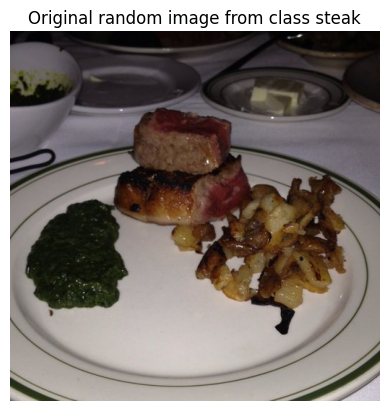

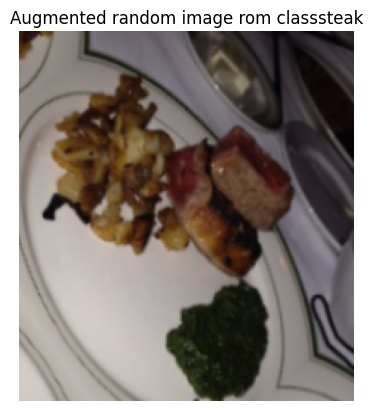

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class=random.choice(train_datagen_1_percent.class_names)
target_dir='/content/10_food_classes_1_percent/train/'+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+ '/' +random_image
print(random_image_path)

img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f'Original random image from class {target_class}')

img=tf.image.resize(img,size=(224,224))
augmented_img=tf.squeeze(data_augmentation(tf.expand_dims(img,axis=0)))
plt.figure()
plt.title(f'Augmented random image rom class{target_class}')
plt.axis(False)
plt.imshow(augmented_img/255.)


In [ ]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=input_shape,name='input_shape')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)
model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_1=model_1.fit(train_datagen_1_percent,epochs=5,
                      batch_size=32,
                      steps_per_epoch=len(train_datagen_1_percent),
                      validation_data=test_datagen_1_percent,
                      validation_steps=len(test_datagen_1_percent))



Epoch 1/5
3/3 [==============================] - 24s 6s/step - loss: 2.3426 - accuracy: 0.1143 - val_loss: 2.2051 - val_accuracy: 0.1940
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.0606 - accuracy: 0.1857 - val_loss: 2.0825 - val_accuracy: 0.2856
Epoch 3/5
3/3 [==============================] - 13s 6s/step - loss: 1.8595 - accuracy: 0.4286 - val_loss: 1.9774 - val_accuracy: 0.3660
Epoch 4/5
3/3 [==============================] - 10s 5s/step - loss: 1.7070 - accuracy: 0.6286 - val_loss: 1.8801 - val_accuracy: 0.4220
Epoch 5/5
3/3 [==============================] - 14s 6s/step - loss: 1.5166 - accuracy: 0.6714 - val_loss: 1.7902 - val_accuracy: 0.4772


In [ ]:
model_1.evaluate(test_datagen_1_percent)

79/79 [==============================] - 8s 82ms/step - loss: 1.7902 - accuracy: 0.4772


[1.7902381420135498, 0.4772000014781952]

In [ ]:
results_percent_data_aug=model_1.evaluate(test_datagen_1_percent)
results_percent_data_aug

79/79 [==============================] - 8s 97ms/step - loss: 1.7902 - accuracy: 0.4772


[1.7902376651763916, 0.4772000014781952]

In [ ]:
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                         image_size=IMG_SIZE,
                                                                         label_mode='categorical')
test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                         image_size=IMG_SIZE,
                                                                         label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=True,
                                                       save_freq='epoch',
                                                       verbose=1)

In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=input_shape,name='input_shape')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)
model_1=tf.keras.Model(inputs,outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

initial_epochs=5
history_2=model_2.fit(train_data_10_percent,epochs=initial_epochs,
                      batch_size=32,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data_10_percent,
                      validation_steps=len(test_data_10_percent),
                      callbacks=[checkpoint_callback])

Epoch 1/5
23/24 [===========================>..] - ETA: 0s - loss: 1.6174 - accuracy: 0.5435
Epoch 1: val_loss improved from inf to 1.16943, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 22s 485ms/step - loss: 1.6150 - accuracy: 0.5427 - val_loss: 1.1694 - val_accuracy: 0.7376
Epoch 2/5
23/24 [===========================>..] - ETA: 0s - loss: 1.1294 - accuracy: 0.7269
Epoch 2: val_loss improved from 1.16943 to 0.86442, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 7s 301ms/step - loss: 1.1290 - accuracy: 0.7253 - val_loss: 0.8644 - val_accuracy: 0.8068
Epoch 3/5
23/24 [===========================>..] - ETA: 0s - loss: 0.8932 - accuracy: 0.7799
Epoch 3: val_loss improved from 0.86442 to 0.72333, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 7s 297ms/step - loss: 0.8945 - accuracy: 0.7800 - val_loss

In [ ]:
model_2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 Global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                          

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results=model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 66ms/step - loss: 0.5844 - accuracy: 0.8520


In [ ]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7df023737880> True
<keras.src.engine.sequential.Sequential object at 0x7df0237c7430> True
<keras.src.engine.functional.Functional object at 0x7df0235e5ab0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7df0235e69b0> True
<keras.src.layers.core.dense.Dense object at 0x7defce1a25f0> True


In [ ]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_12 False
1 rescaling_18 False
2 normalization_9 False
3 rescaling_19 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze F

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
for i,layer in enumerate(model_2.layers[2].layers[-10:]):
  layer.trainable = True

In [ ]:
base_model.trainable=False
for layer in base_model.layers[-10:]:
  layer.trainable=True

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_12 False
1 rescaling_18 False
2 normalization_9 False
3 rescaling_19 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze F

In [ ]:
fine_tune_epochs=initial_epochs+5

history_fine_10_percent_aug=model_2.fit(train_data_10_percent,
                                        epochs=fine_tune_epochs,
                                        validation_data=test_data_10_percent,
                                        steps_per_epoch=len(train_data_10_percent),
                                        validation_steps=len(test_data_10_percent),
                                        initial_epoch=history_2.epoch[-1])

Epoch 5/10
24/24 [==============================] - 17s 348ms/step - loss: 0.6466 - accuracy: 0.8307 - val_loss: 0.5799 - val_accuracy: 0.8528
Epoch 6/10
24/24 [==============================] - 8s 314ms/step - loss: 0.6257 - accuracy: 0.8493 - val_loss: 0.5738 - val_accuracy: 0.8548
Epoch 7/10
24/24 [==============================] - 8s 332ms/step - loss: 0.6244 - accuracy: 0.8387 - val_loss: 0.5684 - val_accuracy: 0.8544
Epoch 8/10
24/24 [==============================] - 8s 331ms/step - loss: 0.6069 - accuracy: 0.8493 - val_loss: 0.5648 - val_accuracy: 0.8548
Epoch 9/10
24/24 [==============================] - 7s 279ms/step - loss: 0.6105 - accuracy: 0.8480 - val_loss: 0.5607 - val_accuracy: 0.8560
Epoch 10/10
24/24 [==============================] - 7s 280ms/step - loss: 0.5923 - accuracy: 0.8520 - val_loss: 0.5550 - val_accuracy: 0.8576
